## Лабораторная №1 

## Ильиных В. М. М8О-201Б-19

Результат скидывать на почту tt48@mail.ru в виде файла *.ipynb<br>
В теме письма указывать, что это второй курс и что это "системы аналитических вычислений" или "пакеты". + номер ДЗ туда же.<br>
В содержании письма указывать ФИО и группу.

<h1>Задание 0</h1>
<pre>
Установить SageMath 9.2 (https://www.sagemath.org/)
В случае проблем - писать на почту.
	
Как резервный вариант - on-line редакторы
	https://cocalc.com/doc/jupyter-notebook.html
		есть некоторые проблемы по LaTeX возможностям.
	https://sagecell.sagemath.org/
		работает, но предоставляется только одна ячейка
	
	- медленнее работают
		, есть ограничения по количеству времени на выполнение запроса
		, некоторые ошибки по синтаксису опускаются (LaTeX касается)
		, больше места экрана уходит на менюшки и прочего.
		
	+ ничего устанавливать не нужно. Можно даже не регистрироваться.
</pre>

<h1>Задание 1 - часть 1 - Квадратик</h1>
Доделать начинания, что были на занятии:<br>
при помощи функции отображения графиков отобразить квадратик.<br>
Задав квадратик матрицей координат, повернуть и сдвинуть его относительно исходного положения.<br>
Вывести исходный квадратик и результат.


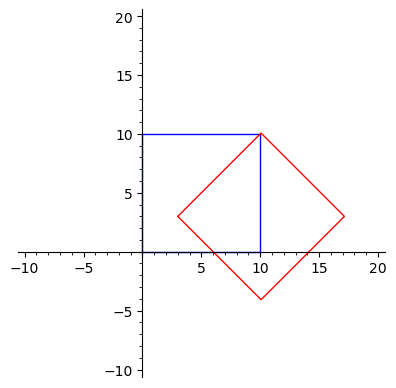

In [1]:
a = 10
rectangle_src = matrix([[0, 0], [0, a], [a, a], [a, 0], [0, 0]])
alpha = math.radians(-45)
mat_rot = matrix([
    [cos(alpha), sin(alpha)]
    , [ -sin(alpha), cos(alpha)]
])
end_rectangle = rectangle_src * mat_rot + matrix([[3,3] for i in range(5)])

show(
    line(rectangle_src)
    + line(end_rectangle, rgbcolor = (1,0,0))
    , xmin=-10, xmax=20, ymin=-10, ymax=20, aspect_ratio=1)

<h1>Задание 1 - часть 2 - Исследование функции</h1>
Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>
Построить график функции, асимптоты, промежутки знакопостоянства. (см. папку с материалами).<br>
Необходимо также сделать минимальное, но оформление решения, а не просто набор ответов.

<h4>Справочные материалы:</h4>
<ol>
    <li>Гусак, 1999г. - исследование графиков</li>
    <li>Ефимов, Поспелов — т.2, стр. 86</li>
    <li>Ильин, Поздняк — т.1, стр. 143 и стр. 300-327</li>
    <li>Пискунов — стр. 144-184</li>
</ol>

<h1>Варианты:</h1>

In [2]:
tasks = [ 
            sin(2*x**3)**2/x**3  # исправлен
            , (x**2 - 4)*sin((pi*(x**2))/6) / (x**2 - 1)
            , sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x)
            , 1/2 * ln(sqrt(x^2 + 1) / sqrt(x^2 - 1)) - 15*x**2
            , (x^3 - x^2 - x + 1)^(1/3) / tan(x)
            , 2*log((x - 1) / x) + 1
            , ln(x - 1) / (x - 1)^2
        ]

В your_number присвоить ваш номер по списку в рейтинге.
Рейтинги ваши лежат <a href='https://docs.google.com/spreadsheets/d/14cdxMHQw2Bd4i_4qoYWzV4olXgaNuckR6ZzWLCQQEUg/edit?usp=sharing'>здесь</a>

In [3]:
def get_variant_for_number(_number, _variations_quo):
    return (_number - 1) % _variations_quo


your_number = 9  # сюда вбить ваш номер по списку в рейтинге 
number_of_your_task = get_variant_for_number(_number=your_number, _variations_quo=len(tasks))
print(f"Номер вашего задания: {number_of_your_task}.")
show("Ваша функция: ", tasks[number_of_your_task])

Номер вашего задания: 1.


'Ваша функция: ' (x^2 - 4)*sin(1/6*pi*x^2)/(x^2 - 1)

<h1 >Примечание:</h1>
номер 1 был изменен в более простую сторону<br>
Номер 3 следует исследовать как $(((3*x**3 + 2*x**2 - 10*x)**(2))**(1/4)) / (4*x)$,
и поделить на два случая подкоренного выражения (когда значение с минусом и когда с плюсом),
чтобы избежать незнакомые операторы и пр.<br>
Номер 4 заменен <br>
В номере 4 для более простого вида производных использовать simplify_full(). Чтобы не вываливались warning'и - разбить график на два интервала по области определения. Для инофрмативности графиков - ограничить значение по y (параметр ymax у plot или show).

In [4]:
f(x) = (x**2 - 4)*sin((pi*(x**2))/6) / (x**2 - 1)

Построим график функции:

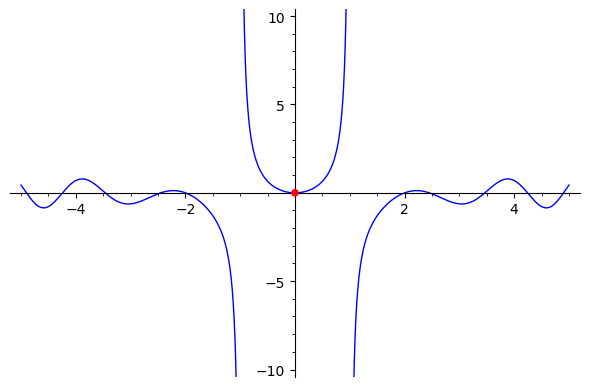

In [5]:
graphics = plot(f, xmin=-5, xmax=5, ymin=-10, ymax=10, detect_poles = true)
graphics  += point((0, 0), color="red", size=30, zorder=10)
graphics.show()

### Область определения функции
Найдем область определеления. 

In [6]:
solve((x**2-1) != 0, x, algorithm = 'sympy') 

[[x < -1], [[x > -1], [x < 1]], [x > 1]]

### Периодичность, четность, нечетность функции

Определим четность/нечетность:

In [7]:
if (f(x) == f(-x)):
    print("Функция чётная")
elif (f(x) == -f(-x)):
    print("Функция нечётная")

Функция чётная


Посмотрим периодичность функции:

In [8]:
var("T")
eq1 = f(x) - f(x + T)
eq1.simplify_full()
solve(eq1, T, algorithm = 'sympy')

Complement(ConditionSet(T, Eq(-(x**2 - 4)*((T + x)**2 - 1)*sin(pi*x**2/6) + (x**2 - 1)*((T + x)**2 - 4)*sin(pi*(T**2/6 + T*x/3 + x**2/6)), 0), Complexes), FiniteSet(1 - x, -x - 1))

In [9]:
show(eq1(x=2, T=2))
show(f(x=2))
print("f(x)!=f(x-T) => функция непериодична")

-2/5*sqrt(3)

0

f(x)!=f(x-T) => функция непериодична


Функция является чётной и непериодичной. 

### Точки пересечения графика с осями координат

In [10]:
print("Пересечение с осью ординат")
solve(x == 0, x, algorithm = 'sympy')

Пересечение с осью ординат


[x == 0]

Пересечение с осью абсцисс
Точек бесконечно много, поэтому рассмотрим некоторые из них

In [11]:
show(find_root(f(x) == 0, -3.5,-1))
show(find_root(f(x) == 0, 1, 3.5))
show(find_root(f(x) == 0, -5.5, -3.5))
show(find_root(f(x) == 0, -3.5, 5.5))
show(find_root(f(x) == 0, -0.1, 0.1))

-2.0

2.0

-4.242640687119285

4.242640687119225

0.0

### Промежутки знакопостоянства

Рассмотрим сначала неравенство $ f(x) > 0 $

In [12]:
solve(f(x) > 0, x )

[[2 < x, sin(1/6*pi*x^2) > 0],
 [-1 < x, x < 1, sin(1/6*pi*x^2) > 0],
 [x < -2, sin(1/6*pi*x^2) > 0],
 [1 < x, x < 2, -sin(1/6*pi*x^2) > 0],
 [-2 < x, x < -1, -sin(1/6*pi*x^2) > 0]]

In [13]:
print("Где sin(1/6*pi*x^2) > 0, если x ∈ (-k*sqrt(6); k*sqrt(6))")

Где sin(1/6*pi*x^2) > 0, если x ∈ (-k*sqrt(6); k*sqrt(6))


Рассмотрим f(x) < 0

In [14]:
solve(f(x) < 0, x)

[[1 < x, x < 2, sin(1/6*pi*x^2) > 0],
 [-2 < x, x < -1, sin(1/6*pi*x^2) > 0],
 [2 < x, -sin(1/6*pi*x^2) > 0],
 [-1 < x, x < 1, -sin(1/6*pi*x^2) > 0],
 [x < -2, -sin(1/6*pi*x^2) > 0]]

In [15]:
print("Где sin(1/6*pi*x^2) < 0, если x ∈ (-∞; -k*sqrt(6))⋃(k*sqrt(6); +∞)")

Где sin(1/6*pi*x^2) < 0, если x ∈ (-∞; -k*sqrt(6))⋃(k*sqrt(6); +∞)


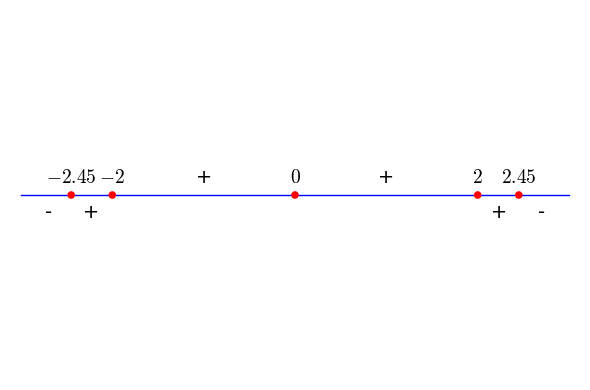

In [16]:
intervals = plot(0, xmin=-3, xmax=3, ymin=-0.5, ymax=0.5)
intervals += point((0, 0), color="red", size=30, zorder=10)
intervals += point((2, 0), color="red", size=30, zorder=10)
intervals += point((-2, 0), color="red", size=30, zorder=10)
intervals += point((2.45, 0), color="red", size=30, zorder=10)
intervals += point((-2.45, 0), color="red", size=30, zorder=10)
intervals += text("$0$", (0, 0.05), color="black", fontsize=14)
intervals += text("$2$", (2, 0.05), color="black", fontsize=14)
intervals += text("$-2$", (-2, 0.05), color="black", fontsize=14)
intervals += text("$2.45$", (2.45, 0.05), color="black", fontsize=14)
intervals += text("$-2.45$", (-2.45, 0.05), color="black", fontsize=14)
intervals += text("+", (1 , 0.05), color="black", fontsize=14)
intervals += text("+", (-1 , 0.05), color="black", fontsize=14)
intervals += text("+", (2.23 , -0.05), color="black", fontsize=14)
intervals += text("+", (-2.23 , -0.05), color="black", fontsize=14)
intervals += text("-", (2.7 , -0.05), color="black", fontsize=14)
intervals += text("-", (-2.7 , -0.05), color="black", fontsize=14)
intervals.show(axes=False)

### Промежутки возрастания и убывания

Найдем промежутки возрастания и убывания. 

In [17]:
d = diff(f,x)
d.show()

x |--> 1/3*pi*(x^2 - 4)*x*cos(1/6*pi*x^2)/(x^2 - 1) + 2*x*sin(1/6*pi*x^2)/(x^2 - 1) - 2*(x^2 - 4)*x*sin(1/6*pi*x^2)/(x^2 - 1)^2

In [18]:
solve(d > 0, x)

[[0 < x,
  pi*x^4*cos(1/6*pi*x^2) - 5*pi*x^2*cos(1/6*pi*x^2) + 4*pi*cos(1/6*pi*x^2) + 18*sin(1/6*pi*x^2) > 0],
 [x < 0,
  -pi*x^4*cos(1/6*pi*x^2) + 5*pi*x^2*cos(1/6*pi*x^2) - 4*pi*cos(1/6*pi*x^2) - 18*sin(1/6*pi*x^2) > 0]]

Результат не очевиден на первый взгляд. Рассмотрим график, попробуем найти точки экстремума с помощью него.

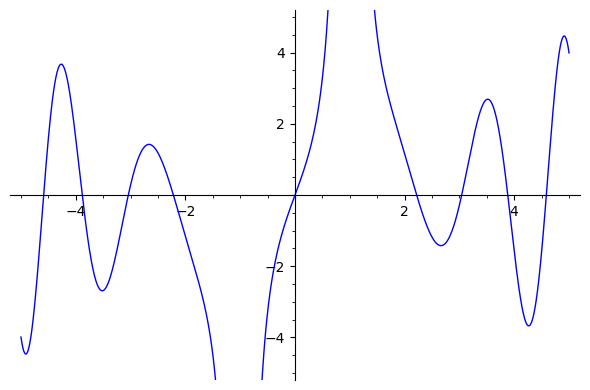

In [19]:
graphics_diff = plot(d, xmin=-5, xmax=5, ymin=-5, ymax=5)
graphics_diff.show()

Точек  экстремума много, возьмем несколько при $x > 0$.

In [20]:
d1 = find_root(d == 0, 1, 2.5)
d2 = find_root(d == 0, 2.6, 3.6) 
show(d1)
show(d2)

2.218847215136172

3.0415623282664055

Определим знаки производных на интервалах

In [21]:
d(d1-0.001).show()
if(d(d1-0.001)<0):
    print("-")
else:
    print("+")
d(d2+0.001).show()
if(d(d1+0.001)<0):
    print("-")
else:
    print("+")

0.173338486221252*pi*cos(0.819807711614545*pi) + 0.866495718194071*sin(0.819807711614545*pi)

+


0.645712940107290*pi*cos(1.54286425356431*pi) + 0.267748255160676*sin(1.54286425356431*pi)

-


In [22]:
d(d2-0.001).show()
if(d(d2-0.001)<0):
    print("-")
else:
    print("+")
d(d2+0.001).show()
if(d(d2+0.001)<0):
    print("-")
else:
    print("+")

0.644745127672155*pi*cos(1.54083654534547*pi) + 0.268362488611092*sin(1.54083654534547*pi)

-


0.645712940107290*pi*cos(1.54286425356431*pi) + 0.267748255160676*sin(1.54286425356431*pi)

+


Видим, что до 2.2188... функция возрастает, затем убывает до точки 3.0415 и возрастает после неё

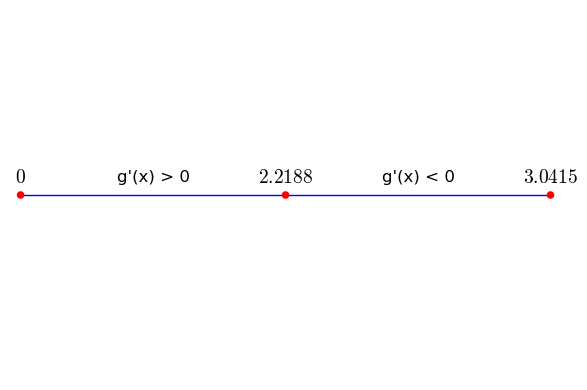

In [23]:
intervals = plot(0, xmin=-0.1, xmax=0.1, ymin=-0.5, ymax=0.5)
intervals += point((0, 0), color="red", size=30, zorder=10)
intervals += point((-0.1, 0), color="red", size=30, zorder=10)
intervals += point((0.1, 0), color="red", size=30, zorder=10)
intervals += text("$2.2188$", (0, 0.05), color="black", fontsize=14)
intervals += text("$0$", (-0.1, 0.05), color="black", fontsize=14)
intervals += text("$3.0415$", (0.1, 0.05), color="black", fontsize=14)
intervals += text("g'(x) < 0", (0.05 , 0.05), color="black", fontsize=12)
intervals += text("g'(x) > 0", (-0.05 , 0.05), color="black", fontsize=12)
intervals.show(axes=False)

### Точки экстремума и значения в этих точках

Посмотрим другие экстремумы функции.

In [24]:
d3 = find_root(d == 0, 3.7, 4)
d4 = find_root(d == 0, 4, 5) 
show(d3)
show(d4)

3.882038336139626

4.586073411467745

Проверим, что это экстремумы

In [25]:
d(d3-0.001).show()
if(d(d3-0.001)<0):
    print("-")
else:
    print("+")
d(d3+0.001).show()
if(d(d3+0.001)<0):
    print("-")
else:
    print("+")

1.01769368387430*pi*cos(2.51040976109757*pi) + 0.117754271857422*sin(2.51040976109757*pi)

+


1.01852269969437*pi*cos(2.51299778665500*pi) + 0.117555195003142*sin(2.51299778665500*pi)

-


In [26]:
d(d4-0.001).show()
if(d(d4-0.001)<0):
    print("-")
else:
    print("+")
d(d4+0.001).show()
if(d(d4+0.001)<0):
    print("-")
else:
    print("+")

1.29936630777182*pi*cos(3.50381636475808*pi) + 0.0686188864052830*sin(3.50381636475808*pi)

-


1.30014278236322*pi*cos(3.50687374703239*pi) + 0.0685232030886448*sin(3.50687374703239*pi)

+


Знаки в окрестностях точек отличаются, значит, это экстремумы

### Непрерывность. Наличие точек разрыва и их классификация

На области определения функция непрерывна. Рассмотрим точки $x=-1$ и $x=1$

Сначала проверим в точке $x=-1$

In [27]:
limit(f(x), x = --1).show()
limit(f(x), x = +-1).show()

Infinity

Infinity

Т.е. неустранимый разрыв 2-ого рода

Проверяем $x=1$

In [28]:
limit(f(x), x = -1).show()
limit(f(x), x = +1).show()

Infinity

Infinity

И это тоже неустранимый разрыв 2-ого рода

### Асимптоты

Найдем асимптоты.

In [29]:
limit(f(x)/x, x=-1).show()

Infinity

In [30]:
limit(f(x)/x, x=1).show()

Infinity

In [31]:
limit(f(x)/x, x=infinity).show()

0

In [32]:
limit(f(x), x=infinity).show()

ind

Наклонных асимптот нет
Получается, функция имеет две вертикальные асимптоты $x=-1$ и $x=1$

Построим график с асимптотами:

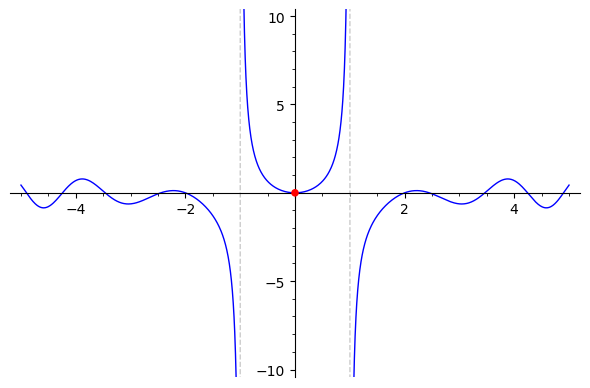

In [33]:
graphics = plot(f, xmin=-5, xmax=5, ymin=-10, ymax=10, detect_poles='show')
graphics  += point((0, 0), color="red", size=30, zorder=10)
graphics.show()